# Explore Real-Time Data on Iguazio via Integrated Notebooks

## Analyze Real-Time Data Using Spark Streaming, SQL, and ML
iguazio database apears to Spark as native Spark Data Frames<br>
Spark is auto-provisioned and configured on iguazio platform, no DevOps requiered 

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Iguazio Integration demo").getOrCreate()

In [64]:
spark.read.format("io.iguaz.v3io.spark.sql.kv").load("v3io://bigdata/stocks").show()

+-------+--------+------+--------+-------------------+--------------------+--------+--------+
|  price|  volume|symbol|exchange|         last_trade|                name|currency|timezone|
+-------+--------+------+--------+-------------------+--------------------+--------+--------+
|1039.55| 1807725|  GOOG|  NASDAQ|2018-12-10 16:00:01|Alphabet Inc Class C|     USD|     EST|
|1641.03| 7494808|  AMZN|  NASDAQ|2018-12-10 16:00:02|    Amazon.com, Inc.|     USD|     EST|
| 107.59|40801525|  MSFT|  NASDAQ|2018-12-10 16:00:02|Microsoft Corpora...|     USD|     EST|
|  47.21|23289000|  INTC|  NASDAQ|2018-12-10 16:00:02|   Intel Corporation|     USD|     EST|
|  169.6|62025994|  AAPL|  NASDAQ|2018-12-10 16:00:02|          Apple Inc.|     USD|     EST|
+-------+--------+------+--------+-------------------+--------------------+--------+--------+



## Run Interactive SQL Queries on Real-Time Data
Support full ANSI SQL through native integration of Apache Presto over iguazio database<br>
Same data apears through different APIs (Spark, Presto SQL, native Pandas, DynamoDB like API)

In [65]:
%sql select * from bigdata.stocks where exchange='NASDAQ'

 * presto://presto.default-tenant.svc:8080/v3io
Done.


volume,symbol,last_trade,price,timezone,name,exchange,currency
40801525,MSFT,2018-12-10 16:00:02,107.59,EST,Microsoft Corporation,NASDAQ,USD
23289000,INTC,2018-12-10 16:00:02,47.21,EST,Intel Corporation,NASDAQ,USD
7494808,AMZN,2018-12-10 16:00:02,1641.03,EST,"Amazon.com, Inc.",NASDAQ,USD
62025994,AAPL,2018-12-10 16:00:02,169.6,EST,Apple Inc.,NASDAQ,USD
1807725,GOOG,2018-12-10 16:00:01,1039.55,EST,Alphabet Inc Class C,NASDAQ,USD


## Read NoSQL Data as Real-Time DataFrame Stream
`frames` is a high-performance streaming API into iguazio database presented as Pandas DataFrame<br>
support multiple backend data models (Key/value, Time-series, Stream, Object/file) 

In [1]:
import pandas as pd
import v3io_frames as v3f
client = v3f.Client('framesd:8081')

In [2]:
kvdf = client.read(backend='kv', table='stocks', filter='exchange=="NASDAQ"')
kvdf.head()

,last_trade,currency,price,volume,exchange,symbol,name,timezone
__name,,,,,,,,
GOOG,2018-12-10 16:00:01,USD,1039.55,1807725.0,NASDAQ,GOOG,Alphabet Inc Class C,EST
INTC,2018-12-10 16:00:02,USD,47.21,23289000.0,NASDAQ,INTC,Intel Corporation,EST
AAPL,2018-12-10 16:00:02,USD,169.60,62025994.0,NASDAQ,AAPL,Apple Inc.,EST
AMZN,2018-12-10 16:00:02,USD,1641.03,7494808.0,NASDAQ,AMZN,"Amazon.com, Inc.",EST
MSFT,2018-12-10 16:00:02,USD,107.59,40801525.0,NASDAQ,MSFT,Microsoft Corporation,EST


## Read the Time-Series data (in iguazio TSDB) as Pandas DataFrame
Use database side aggregations, joins and filtering on the real-time metrics data

In [3]:
# Read Time-Series aggregates from the DB (returned as a data stream, use concat to assemble the frames)
tsdf = client.read(backend='tsdb', query='select avg(*),max(*),min(*) from stock_metrics', step='60m', start="now-7d", end='now',multi_index=True)
tsdf.head()

,,,avg(sentiment),max(sentiment),min(sentiment),avg(volume),max(volume),min(volume),avg(price),max(price),min(price)
time,exchange,symbol,,,,,,,,,
2019-02-26 09:12:42,NASDAQ,GOOG,-0.112062,0.986880,-0.992005,5049.581395,37909.0,505.0,1103.701860,1107.44,1100.00
2019-02-26 10:12:42,NASDAQ,GOOG,-0.046302,0.990247,-0.985385,2305.633333,7819.0,577.0,1108.378167,1111.72,1105.09
2019-02-26 11:12:42,NASDAQ,GOOG,0.040060,0.999068,-0.967797,2218.316667,16837.0,359.0,1109.505833,1111.98,1106.86
2019-02-26 12:12:42,NASDAQ,GOOG,0.067250,0.989887,-0.969078,2433.266667,13290.0,385.0,1107.598667,1109.35,1105.61
2019-02-26 13:12:42,NASDAQ,GOOG,-0.120975,0.889391,-0.997564,1832.666667,6090.0,240.0,1110.981500,1112.07,1109.78


## Run interesting Analysis On Real-Time Data
e.g. compare stock price volatility between cloud providers

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

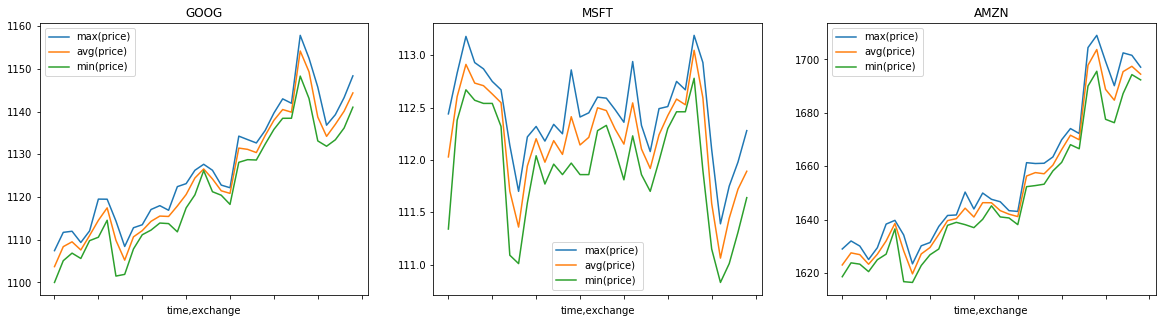

In [5]:
stock_symbols = ['GOOG','MSFT','AMZN']   
fig, axarr = plt.subplots(1,3)
pricesdf = tsdf[['max(price)','avg(price)','min(price)']]

for sym, ax in zip(stock_symbols, axarr):
    pricesdf.xs(sym, level='symbol').plot(ax=ax, title=sym, figsize=[20,5])

## Read the Twitter + Sentiments feed as Pandas DataFrame
Streaming data generated in by nuclio functions can be read in real-time or historically. <br>It can be distributed to multiple workers for scalability via sharding/partitioning. 

In [6]:
streamdf = client.read(backend='stream', table='stock_stream',seek='earliest', shard_id='0')
streamdf.head(15)

,stream_time,text,user,id,created_at,polarity,subjectivity
seq_number,,,,,,,
1,2019-03-04 23:02:57.592623853,bla bla bla,@supermen,768687,2019-02-07 09:34:00,0.3,0.1


## Save Any Data "To Go" as a CSV file (or other formats)

In [10]:
streamdf.to_csv('mystream.csv')